# Scintillation Detector Plot Examples




In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# RELATIVE PATH OF THE CHOSEN DATA SET


DS_1_path = "DATASET_1.txt.TXT"
DS_2_path = "DATASET_2.txt.TXT"
DS_3_path = "DATASET_3_S.txt.TXT"



def import_dataset(file_name):
  '''
  This function will import the data from the specified file and return a pandas dataframe.

  Parameters: 
  file_name (str): The name of the file to be imported.

  Returns:
  pandas dataframe: The imported data.
  '''
  return pd.read_csv(
        file_name,
        skiprows=19,
        names=['Entry','ArdTime','ADC', 'SiPM', 'Deadtime', 'Temp'],
        lineterminator='\n',
        sep='\s+',
        encoding='unicode_escape',
        engine='python'
    )

# import the datasets

dataset_1 = import_dataset(DS_1_path)
dataset_2 = import_dataset(DS_2_path)
dataset_3 = pd.read_csv(DS_3_path, skiprows=19, names=['Entry','ArdTime','ADC', 'SiPM', 'Deadtime', 'Temp'], lineterminator='\n', sep='\s+', encoding='unicode_escape', engine='python')


# converting the ArdTime column from milliseconds to seconds for all datasets

dataset_1.ArdTime = dataset_1.ArdTime/1000 # converting the ArdTime column from milliseconds to seconds for dataset_1
dataset_2.ArdTime = dataset_2.ArdTime/1000 # converting the ArdTime column from milliseconds to seconds for dataset_2
dataset_3.ArdTime = dataset_3.ArdTime/1000 # converting the ArdTime column from milliseconds to seconds for dataset_3

dataset_1.Deadtime = dataset_1.Deadtime/1000 # converting the Deadtime column from milliseconds to seconds for dataset_1
dataset_2.Deadtime = dataset_2.Deadtime/1000 # converting the Deadtime column from milliseconds to seconds for dataset_2
dataset_3.Deadtime = dataset_3.Deadtime/1000 # converting the Deadtime column from milliseconds to seconds for dataset_3



# SiPM Voltage Histogram

Text(0, 0.5, 'Events')

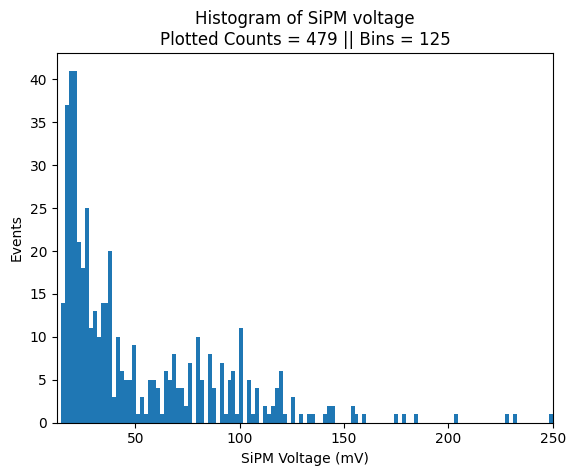

In [7]:
''' ADJUSTABLE VARIABLES '''

x_min = 12.5 # Minimum range of the histogram 

x_max = 250 # Maximum range of the histogram 

bin = 125 # Number of histogram bins 

density = False # True: Normallized plot || False: Non-normallized plot

x_range = [x_min, x_max] # Histogram plot range

x_label = 'SiPM Voltage (mV)' # label for the x axis

y_label = 'Events' # label for the y axis


''' CALCULATIONS '''

SiPM_array = np.array(dataset_1.SiPM) # Numpy array of all SiPM values

event_number = len(SiPM_array[(SiPM_array >= x_min) & (SiPM_array <= x_max)]) # Get the number of events within the plot range


''' PLOTTING CODE '''

plt.figure() # Begin figure setup

plt.hist(dataset_1.SiPM, bins = bin, range = x_range, density = density, label='Dataset 1') # Calling the histogram matplotlib function and providing the spreadsheet column in use and the number of bins we will use

# plot the histogram for dataset 3 on the same plot
plt.hist(dataset_3.SiPM, bins = bin, range = x_range, density = density, label='Dataset 3')

plt.title('Histogram of SiPM voltage\nPlotted Counts = %d || Bins = %i' % (event_number, bin)) # Setting the title of the plot

plt.xlim(x_range) # the graph's domain 

plt.xlabel(x_label) # x axis label

plt.ylabel(y_label) # y axis label

# Histogram of event Time

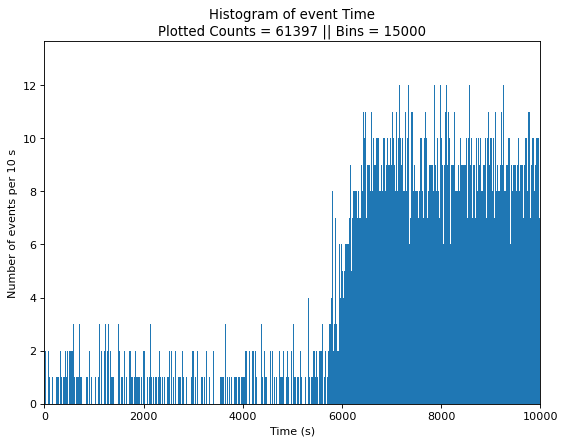

In [5]:
''' ADJUSTABLE VALUES '''

x_min = 0 # Minimum range of the histogram

x_max = 10000 # Maximum range of the histogram

bins = 15000 # Number of histogram bins

#bins = np.arange(min(filePD.ArdTime), max(filePD.ArdTime) + 10, 10) #or specify the size of the bins in seconds

density = False # True: Normallized plot || False: Non-normallized plot

x_range = [x_min, x_max] # Histogram plot range

x_label = 'Time (s)' # label for the x axis

y_label = 'events' # label for the y axis


''' CALCULATIONS '''

ardtime_array = np.array(filePD.ArdTime) # Numpy array of entry time values

event_number = len(ardtime_array[(ardtime_array >= x_min) & (ardtime_array <= x_max)]) # Get the number of events within the plot range


''' PLOTTING CODE '''

plt.figure(figsize=(8, 6), dpi=80)

plt.hist(filePD.ArdTime, bins, range = x_range, density = density) # establish the histogram plot

plt.title("Histogram of event Time\nPlotted Counts = %i || Bins = %i" % (event_number, bins)) # Title of the plot

plt.xlabel("Time (s)") # x axis label

plt.ylabel("Number of events per 10 s") # y axis label

plt.xlim(x_range) # the graph's domain

plt.savefig("output")

# Event's SiPM Voltage Plotted as a Function of the Recorded ADC Reading

Text(0.5, 0, 'ADC (Analog to Digital Converter)')

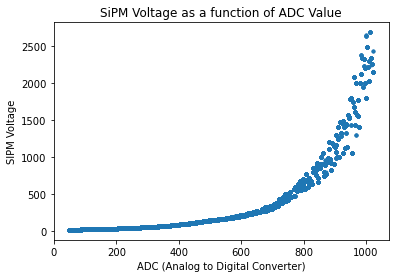

In [13]:
''' PLOTTING CODE '''
plt.figure() 

plt.plot(filePD.ADC, filePD.SiPM,  '.') # Plotting information


plt.ylabel('SIPM Voltage') # y axis label
plt.xlabel('ADC (Analog to Digital Converter)') # x axis label

# Event's SiPM Voltage Plotted as a Function of Time

Text(0.5, 0, 'Time (ms)')

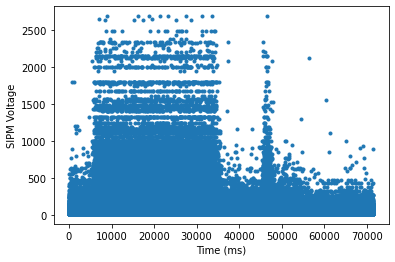

In [ ]:
''' PLOTTING CODE '''
plt.figure() 

plt.plot(filePD.ArdTime, filePD.SiPM,  '.') # Plotting information


plt.ylabel('SIPM Voltage') # y axis label
plt.xlabel('Time (ms)') # x axis label

# Histogram Displaying the Time Between Events

Text(0, 0.5, 'events')

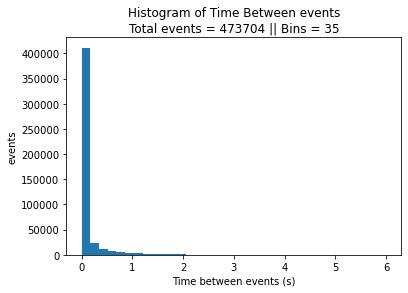

In [4]:
''' ADJUSTABLE VARIABLES '''

#Note that this will take a long time with large datasets, this code could be improved. 

x_min = 0 # Minimum range of the histogram 

x_max = 6 # Maximum range of the histogram 

bins = 35 # Number of histogram bins 

density = False # True: Normalized plot || False: Non-normalized plot

x_range = [x_min, x_max] # Histogram plot range

x_label = "Time between events (s)" # label for the x axis

y_label = 'events' # label for the y axis


''' CALCULATIONS '''

timeDelta_array = np.array([]) # creating an array to store the calculated time deltas

time_initial = 0 # setting the initial time

for i in filePD.ArdTime.array: # for each loop to go through the elements of filePD.ArdTime.array
    
    timeDelta = i - time_initial # finding the time delta between the initial time and the element of the ArdTime array

    timeDelta_array = np.append(timeDelta_array, timeDelta) # Appending the time delta to the timeDelta_array array

    time_initial = i # setting the new initial time to the previous 

event_number = len(timeDelta_array[(timeDelta_array >= x_min) & (timeDelta_array <= x_max)]) # Get the number of events within the plot range


''' PLOTTING CODE '''

plt.hist(timeDelta_array, bins= bins, range = x_range, density = density) # Histogram plot

plt.title("Histogram of Time Between events\nTotal events = %i || Bins = %i" % (event_number, bins)) # Setting the plot title

plt.xlabel(x_label) # x axis label

plt.ylabel(y_label) # y axis label



# Average Rate Calculation and Uncertainty

In [5]:
#note that this assumes a constant rate throughout the data-taking process. The calculation is simply the total number of counts divided by 
#the amount of time the detector was actively reading (total time - deadtime). 

''' UNCERTIANTY CALCULATION '''

N = np.array(dataset.Entry)[-1] # The number of counts made over the course of the run

total_deadtime = np.array(filePD.Deadtime)[-1] # The total time that the arduino was incapable of making measurements

total_time = np.array(filePD.ArdTime)[-1] # The total time of the run 

uncertainty = np.sqrt(N)/(total_time-total_deadtime) # uncertainty rate calculation  

rate = N/(total_time-total_deadtime) 


''' OUTPUT '''

print('The average rate of detections was found to be %f +- %f counts/second' % (rate, uncertainty)) # output statement


The average rate of detections was found to be 9.321028 +- 0.013543 counts/second
